# Time Series Forecasting

promblem statement

sales prediction of the years

importing libraries 

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
# reading out the data

In [145]:
df=pd.read_csv('time_series_forecasting.csv')

In [146]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [147]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [148]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [149]:
df.shape

(9800, 18)

In [150]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [151]:
df.columns=['row_id', 'Order_id', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_id', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_id', 'Category', 'Sub-Category',
       'Product_Name', 'Sales']

In [152]:
df.head()

,row_id,Order_id,Order_Date,Ship_Date,Ship_Mode,Customer_id,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_id,Category,Sub-Category,Product_Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [153]:
print('Order_Date','Ship_ID')

Order_Date Ship_ID


In [154]:
df.dtypes

row_id             int64
Order_id          object
Order_Date        object
Ship_Date         object
Ship_Mode         object
Customer_id       object
Customer_Name     object
Segment           object
Country           object
City              object
State             object
Postal_Code      float64
Region            object
Product_id        object
Category          object
Sub-Category      object
Product_Name      object
Sales            float64
dtype: object

In [2]:
#using datetime import datatime for changing the date format

In [155]:
from datetime import datetime

In [156]:
df['Order_Date']= pd.to_datetime(df['Order_Date'])
df['Ship_Date']= pd.to_datetime(df['Ship_Date'])

In [157]:
df.head()

,row_id,Order_id,Order_Date,Ship_Date,Ship_Mode,Customer_id,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_id,Category,Sub-Category,Product_Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [158]:
df.dtypes

row_id                    int64
Order_id                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_id              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code             float64
Region                   object
Product_id               object
Category                 object
Sub-Category             object
Product_Name             object
Sales                   float64
dtype: object

In [159]:
df.isnull().sum()

row_id            0
Order_id          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_id       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_id        0
Category          0
Sub-Category      0
Product_Name      0
Sales             0
dtype: int64

In [160]:
df.columns

Index(['row_id', 'Order_id', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_id', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_id', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [161]:
#data.drop(columns=['row_id','Order_id','Ship_Date','Ship_Mode','Customer_id','Customer_Name','Segment','Country','City','State','Postal_Code','Region','Product_id','Category','Sub-Category'],axis=1,inplace=True)

In [162]:
df=df[['Product_Name','Sales','Order_Date']]

In [163]:
df.head()

,Product_Name,Sales,Order_Date
0,Bush Somerset Collection Bookcase,261.9600,2017-08-11
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08-11
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12-06
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11-10
4,Eldon Fold 'N Roll Cart System,22.3680,2016-11-10


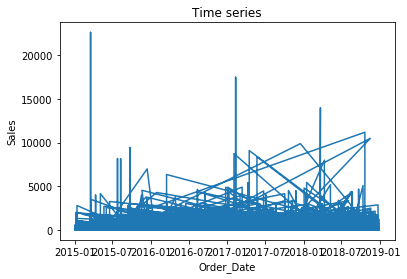

In [164]:
import matplotlib.pyplot as plt

plt.plot(df['Order_Date'],df['Sales'])
plt.title('Time series')
plt.xlabel('Order_Date')
plt.ylabel('Sales')
plt.show()

In [165]:
df["Order_Date"]

0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9795   2017-05-21
9796   2016-12-01
9797   2016-12-01
9798   2016-12-01
9799   2016-12-01
Name: Order_Date, Length: 9800, dtype: datetime64[ns]

In [166]:
product=df[df["Product_Name"]=="Bush Somerset Collection Bookcase"]

In [167]:
product.head()

,Product_Name,Sales,Order_Date
0,Bush Somerset Collection Bookcase,261.960,2017-08-11
5399,Bush Somerset Collection Bookcase,556.665,2017-09-04
8634,Bush Somerset Collection Bookcase,130.980,2018-08-25
9334,Bush Somerset Collection Bookcase,314.352,2018-01-05


In [168]:
ts=df.groupby("Order_Date")["Sales"].sum()

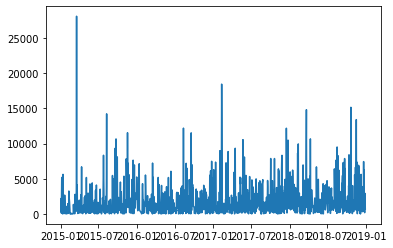

In [169]:
plt.plot(ts)

In [170]:
product=df[df["Order_Date"]=="Year"]
product.head()

,Product_Name,Sales,Order_Date


In [3]:
# adding year month and week columns 

In [171]:
df['year'] = df['Order_Date'].dt.year

In [172]:
df.head()

,Product_Name,Sales,Order_Date,year
0,Bush Somerset Collection Bookcase,261.9600,2017-08-11,2017
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08-11,2017
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12-06,2017
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11-10,2016
4,Eldon Fold 'N Roll Cart System,22.3680,2016-11-10,2016


In [173]:
product=df[df['year']==2015]

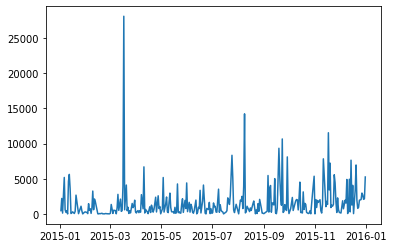

In [174]:
ts1=product.groupby('Order_Date')['Sales'].sum()
plt.plot(ts1)


In [175]:
product=df[df['year']==2016]

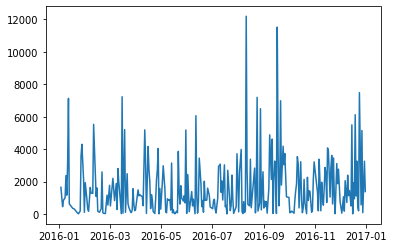

In [176]:
ts2=product.groupby('Order_Date')['Sales'].sum()
plt.plot(ts2)

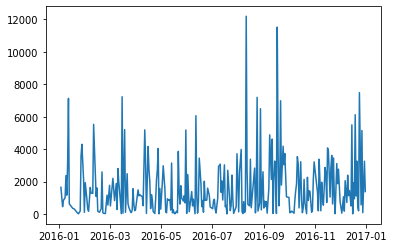

In [177]:
ts3=product.groupby('Order_Date')['Sales'].sum()
plt.plot(ts3)

In [178]:
product=df[df['year']==2018]

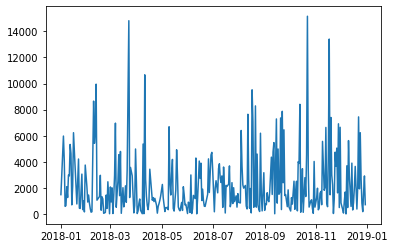

In [179]:
ts4=product.groupby('Order_Date')['Sales'].sum()
plt.plot(ts4)

In [180]:
product=df[df["Order_Date"]=="Month"]


In [181]:
df['Month'] = df['Order_Date'].dt.month

In [182]:
df.head()

,Product_Name,Sales,Order_Date,year,Month
0,Bush Somerset Collection Bookcase,261.9600,2017-08-11,2017,8
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08-11,2017,8
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12-06,2017,12
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11-10,2016,11
4,Eldon Fold 'N Roll Cart System,22.3680,2016-11-10,2016,11


In [183]:
product=df[df["Order_Date"]=="Week"]


In [184]:
df['Week'] = df['Order_Date'].dt.week

In [185]:
df.head()

,Product_Name,Sales,Order_Date,year,Month,Week
0,Bush Somerset Collection Bookcase,261.9600,2017-08-11,2017,8,32
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08-11,2017,8,32
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12-06,2017,12,49
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11-10,2016,11,45
4,Eldon Fold 'N Roll Cart System,22.3680,2016-11-10,2016,11,45


In [186]:
product=df[df['Week']==2015]

In [4]:
# using exponential smoothing model

In [191]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [196]:
#intialize the model
model=ExponentialSmoothing(endog=ts,trend="add",seasonal="mul",seasonal_periods=52,)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [198]:
model_fit=model.fit(optimized=True)

In [199]:
model_fit.forecast(steps=2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1230    8569.354955
1231    6132.093067
dtype: float64

In [200]:
df.head()

,Product_Name,Sales,Order_Date,year,Month,Week
0,Bush Somerset Collection Bookcase,261.9600,2017-08-11,2017,8,32
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08-11,2017,8,32
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12-06,2017,12,49
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11-10,2016,11,45
4,Eldon Fold 'N Roll Cart System,22.3680,2016-11-10,2016,11,45


In [202]:
df['new']=pd.to_datetime(df.Week.astype(str)+df.year.astype(str).add('-1'),format='%V%G-%u')


In [227]:
df.shape

(9800, 7)

In [203]:
df.head()

,Product_Name,Sales,Order_Date,year,Month,Week,new
0,Bush Somerset Collection Bookcase,261.9600,2017-08-11,2017,8,32,2017-08-07
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08-11,2017,8,32,2017-08-07
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12-06,2017,12,49,2017-12-04
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11-10,2016,11,45,2016-11-07
4,Eldon Fold 'N Roll Cart System,22.3680,2016-11-10,2016,11,45,2016-11-07


In [204]:
ts_new=df.groupby("new")["Sales"].sum()

In [228]:
ts_new.shape

(209,)

In [205]:
ts_new.head()

new
2014-12-29     2791.939
2015-01-05    11129.834
2015-01-12     9754.923
2015-01-19     3092.544
2015-01-26     2059.014
Name: Sales, dtype: float64

In [206]:
model=ExponentialSmoothing(endog=ts_new,trend="add",seasonal="mul",seasonal_periods=52,)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


In [207]:
model_fit=model.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [208]:
model_fit.forecast(steps=10)

2018-12-31    20295.468203
2019-01-07    29121.789919
2019-01-14    15575.817409
2019-01-21    11174.220684
2019-01-28    15279.490595
2019-02-04    31517.586851
2019-02-11    15601.246993
2019-02-18     4984.869125
2019-02-25    10701.686895
2019-03-04    22160.967326
Freq: W-MON, dtype: float64

In [209]:
df.head()

,Product_Name,Sales,Order_Date,year,Month,Week,new
0,Bush Somerset Collection Bookcase,261.9600,2017-08-11,2017,8,32,2017-08-07
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08-11,2017,8,32,2017-08-07
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12-06,2017,12,49,2017-12-04
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11-10,2016,11,45,2016-11-07
4,Eldon Fold 'N Roll Cart System,22.3680,2016-11-10,2016,11,45,2016-11-07


In [210]:
ts_new.tail(15)

new
2018-09-17    26104.4330
2018-09-24    12296.0620
2018-10-01     5108.1410
2018-10-08    20990.3150
2018-10-15    13270.8182
2018-10-22    21535.2700
2018-10-29     8131.6480
2018-11-05    11847.2050
2018-11-12    29686.0960
2018-11-19    22212.7690
2018-11-26    21565.0600
2018-12-03     7261.7420
2018-12-10    14181.0200
2018-12-17    19457.0680
2018-12-24    15210.8858
Name: Sales, dtype: float64

In [231]:
train_ts_new=ts_new[ts_new.index<"2018-10-22"]

In [232]:
train_ts_new.shape

(199,)

In [233]:
train_ts_new.tail()

new
2018-09-17    26104.4330
2018-09-24    12296.0620
2018-10-01     5108.1410
2018-10-08    20990.3150
2018-10-15    13270.8182
Name: Sales, dtype: float64

In [234]:
test_ts_new=ts_new[ts_new.index>="2018-10-22"]

In [235]:
test_ts_new

new
2018-10-22    21535.2700
2018-10-29     8131.6480
2018-11-05    11847.2050
2018-11-12    29686.0960
2018-11-19    22212.7690
2018-11-26    21565.0600
2018-12-03     7261.7420
2018-12-10    14181.0200
2018-12-17    19457.0680
2018-12-24    15210.8858
Name: Sales, dtype: float64

In [236]:
model=ExponentialSmoothing(endog=train_ts_new,trend="add",seasonal="mul",seasonal_periods=52,)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


In [237]:
model_fit=model.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [239]:
y_pred=model_fit.forecast(steps=10)


In [243]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=test_ts_new,y_pred=y_pred)


65352901.75473787